In [ ]:
!pip install emoji
!pip install transformers

     |████████████████████████████████| 133kB 5.1MB/s 
     |████████████████████████████████| 2.5MB 5.0MB/s 
     |████████████████████████████████| 3.3MB 35.5MB/s 
     |████████████████████████████████| 901kB 37.6MB/s 


# Thư viện

In [ ]:
from numpy import mean
from numpy import std
import emoji
from sklearn.naive_bayes import ComplementNB
import seaborn as sb
from gensim.models import KeyedVectors

import keras
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from keras.utils.np_utils import to_categorical
from sklearn.multioutput import MultiOutputClassifier
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.tokenize import TweetTokenizer
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, GlobalMaxPool1D, Dense, Flatten, Dropout, LSTM, Bidirectional, GRU
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.svm import SVC
from keras.models import load_model
from joblib import dump
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, BertTokenizer, BertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Đọc dữ liệu

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/NLP for Data Science/NLP_Project/Data_csv/APD_data/Head/APD_train_head.csv')
df_dev = pd.read_csv('/content/drive/MyDrive/NLP for Data Science/NLP_Project/Data_csv/APD_data/Head/APD_dev_head.csv')
df_test = pd.read_csv('/content/drive/MyDrive/NLP for Data Science/NLP_Project/Data_csv/APD_data/Head/APD_test_head.csv')

df_train.head(10)

,text,polarity
0,đồ uống giá tiền Giá 53k size vừa.,1
1,đồ uống loại Giá 53k size vừa.,1
2,nhà hàng giá tiền Nhưng nói chung cũng hơi đắt.,0
3,thức ăn chất lượng Mình ăn rất hôi mùi dầu.,0
4,thức ăn chất lượng Mình ăn chưa baoh thấy mùi ...,2
5,nhà hàng giá tiền 3 dĩa vs 2 lon Revive mà có ...,2
6,nhà hàng tổng quát Ở đây ngay khu vắng nên khá...,1
7,"nhà hàng tổng quát Quán đông lắm, gọi món phải...",2
8,"phục vụ tổng quát Quán đông lắm, gọi món phải ...",0
9,đồ uống chất lượng Mình uống trà sữa lài hạnh ...,2


# X và y

In [ ]:
X_train = df_train['text'].values
X_dev = df_dev['text'].values
X_test = df_test['text'].values

y_train = df_train['polarity'].values
y_dev = df_dev['polarity'].values
y_test = df_test['polarity'].values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


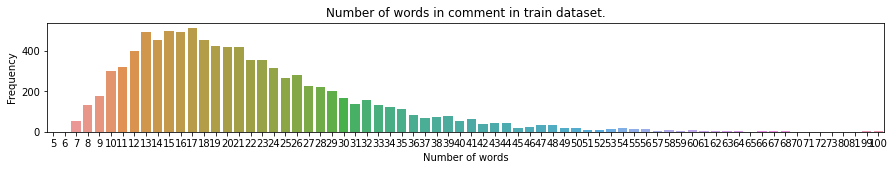

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


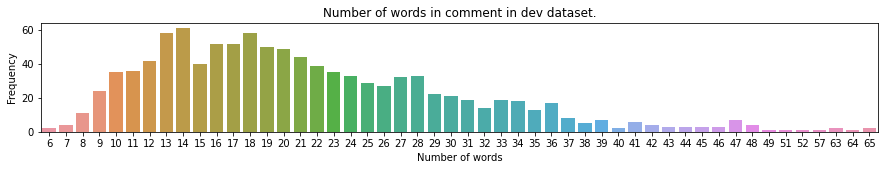

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


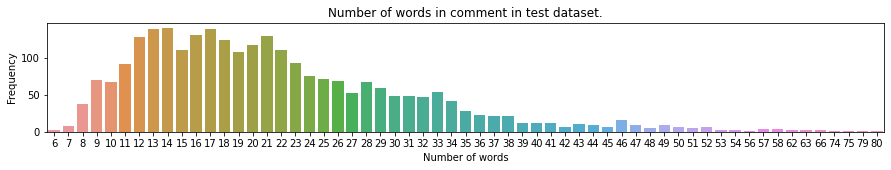

In [ ]:
# Độ dài cmt
def plot_number_word(X, name):
    l = []
    for i in range(len(X)):
        l.append(len(X[i].split()))
    plt.figure(figsize = (15, 2))
    sb.countplot(l)
    plt.title("Number of words in comment in " + name + ' dataset.')
    plt.xlabel("Number of words")
    plt.ylabel("Frequency")
    plt.show()

plot_number_word(X_train, 'train')
plot_number_word(X_dev, 'dev')
plot_number_word(X_test, 'test')

# ================================================================

In [ ]:
model_name = ["Native Bayes",
              "Logistic Regression",
              "SVM",
              "Text-CNN-fastText",
              "Text-CNN-Wikipedia Word2vec",
              "Text-CNN-BPEmb",
              "Text-CNN-MULTI_WC_F_E_B",
              "Bi-GRU-fastText",
              "Bi-GRU-Wikipedia Word2vec",
              "Bi-GRU-BPEmb",
              "Bi-GRU-MULTI_WC_F_E_B",
              "BERT XLM-R",
              "BERT MULTILINGUAL"
              "FPTAI (cased)",
              "PhoBERT"]

# Model---Naive Bayes

Accuracy train:  0.8566293085218862
Accuracy dev:  0.6191832858499525
Accuracy test:  0.6390262457208064
F1 macro test:  0.4098770060756543
Recall macro test:  0.4282573089815733
Precision macro test:  0.7491796161002501
F1 micro test:  0.6390262457208064
Recall micro test:  0.6390262457208064
Precision micro test:  0.6390262457208064


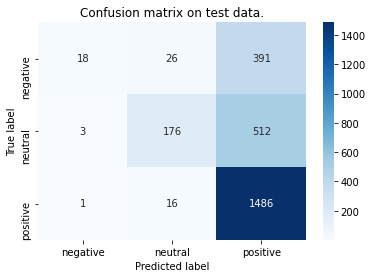

In [ ]:
tv = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3))
x_train = tv.fit_transform(X_train)
x_dev = tv.transform(X_dev)
x_test = tv.transform(X_test)

model = ComplementNB()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_dev_pred = model.predict(x_dev)
y_test_pred = model.predict(x_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
        xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[0]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Head/APD_Not_Process_head.csv",
          index = None, header = True)

# Model---Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy train:  0.8703742863184606
Accuracy dev:  0.7094017094017094
Accuracy test:  0.7238493723849372
F1 macro test:  0.6407756584539576
Recall macro test:  0.6158917965367844
Precision macro test:  0.6971359860452244
F1 micro test:  0.7238493723849372
Recall micro test:  0.7238493723849372
Precision micro test:  0.7238493723849372


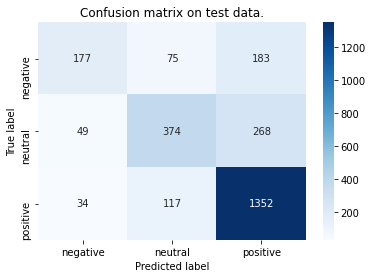

In [ ]:
tv = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3))
x_train = tv.fit_transform(X_train)
x_dev = tv.transform(X_dev)
x_test = tv.transform(X_test)

model = LogisticRegression()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_dev_pred = model.predict(x_dev)
y_test_pred = model.predict(x_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)

print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[1]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Head/APD_Not_Process_head.csv",
          index = None, header = False, mode = 'a')

# Model---SVM

Accuracy train:  0.9181645168111652
Accuracy dev:  0.6989553656220323
Accuracy test:  0.7234689996196272
F1 macro test:  0.6261129138027234
Recall macro test:  0.5925589080003242
Precision macro test:  0.7416055781851264
F1 micro test:  0.7234689996196272
Recall micro test:  0.7234689996196272
Precision micro test:  0.7234689996196272


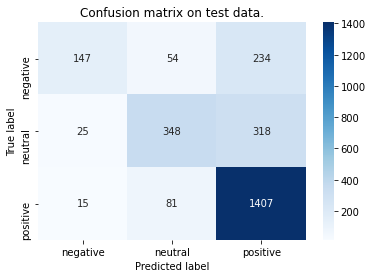

In [ ]:
tv = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3))
x_train = tv.fit_transform(X_train)
x_dev = tv.transform(X_dev)
x_test = tv.transform(X_test)

model = SVC()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_dev_pred = model.predict(x_dev)
y_test_pred = model.predict(x_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[2]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Head/APD_Not_Process_head.csv",
          index = None, header = False, mode = 'a')

# ========================================================

# Model---Text-CNN---FastText

Epoch 1/10
37/37 [==============================] - 47s 64ms/step - loss: 0.6034 - accuracy: 0.4901 - val_loss: 0.5213 - val_accuracy: 0.6078
Epoch 2/10
37/37 [==============================] - 1s 31ms/step - loss: 0.4681 - accuracy: 0.6652 - val_loss: 0.4155 - val_accuracy: 0.7028
Epoch 3/10
37/37 [==============================] - 1s 31ms/step - loss: 0.3486 - accuracy: 0.7695 - val_loss: 0.3704 - val_accuracy: 0.7521
Epoch 4/10
37/37 [==============================] - 1s 34ms/step - loss: 0.2722 - accuracy: 0.8330 - val_loss: 0.3648 - val_accuracy: 0.7521
Epoch 5/10
37/37 [==============================] - 1s 33ms/step - loss: 0.2178 - accuracy: 0.8757 - val_loss: 0.3629 - val_accuracy: 0.7521
Epoch 6/10
37/37 [==============================] - 1s 35ms/step - loss: 0.1787 - accuracy: 0.9054 - val_loss: 0.3773 - val_accuracy: 0.7445
Epoch 7/10
37/37 [==============================] - 1s 35ms/step - loss: 0.1433 - accuracy: 0.9281 - val_loss: 0.3971 - val_accuracy: 0.7474
Epoch 8/10
3

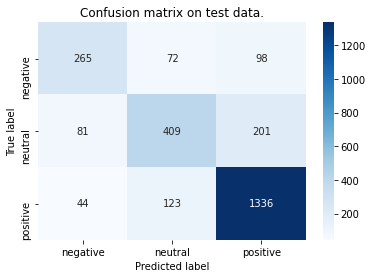

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

# Embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype = np.float32)[:embedding_dim]
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 50
embedding_dim = 300
word_vector = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/cc.vi.300.vec'
embedding_matrix = create_embedding_matrix(word_vector, tokenizer.word_index, embedding_dim)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "post",padding = "post")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "post",padding = "post")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "post",padding = "post")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[3]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Head/APD_Not_Process_head.csv",
          index = None, header = False, mode = 'a')

# Model---Text-CNN---Wikipedia Word2vec

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


Epoch 1/10
37/37 [==============================] - 3s 55ms/step - loss: 0.7609 - accuracy: 0.5272 - val_loss: 0.4884 - val_accuracy: 0.6420
Epoch 2/10
37/37 [==============================] - 1s 37ms/step - loss: 0.4158 - accuracy: 0.7154 - val_loss: 0.4592 - val_accuracy: 0.6828
Epoch 3/10
37/37 [==============================] - 1s 38ms/step - loss: 0.3408 - accuracy: 0.7809 - val_loss: 0.4164 - val_accuracy: 0.7132
Epoch 4/10
37/37 [==============================] - 1s 40ms/step - loss: 0.2778 - accuracy: 0.8449 - val_loss: 0.4295 - val_accuracy: 0.7227
Epoch 5/10
37/37 [==============================] - 2s 41ms/step - loss: 0.2341 - accuracy: 0.8740 - val_loss: 0.4240 - val_accuracy: 0.7246
Epoch 6/10
37/37 [==============================] - 2s 41ms/step - loss: 0.1829 - accuracy: 0.9154 - val_loss: 0.4331 - val_accuracy: 0.7360
Epoch 7/10
37/37 [==============================] - 2s 43ms/step - loss: 0.1465 - accuracy: 0.9406 - val_loss: 0.4454 - val_accuracy: 0.7255
Epoch 8/10
37

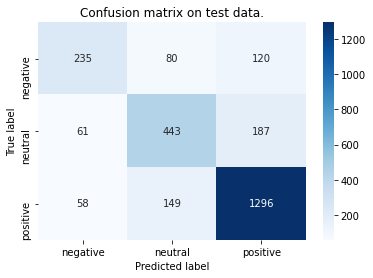

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

def __get_embedding_dict(model_filepath):
    embedding_dict = {}
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]

    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors

    return embedding_dict
def create_embedding_matrix(model_filepath, word2id):

    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    embeddings_dict = __get_embedding_dict(model_filepath)
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 50
embedding_dim = 400
vocab_size = len(tokenizer.word_index) + 1
model_filepath = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/wiki.vi.model.bin'
embedding_matrix = create_embedding_matrix(model_filepath, tokenizer.word_index)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "post",padding = "post")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "post",padding = "post")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "post",padding = "post")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[4]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Head/APD_Not_Process_head.csv",
          index = None, header = False, mode = 'a')

# Model---Text-CNN---BPEmb

     |████████████████████████████████| 1.2MB 11.2MB/s 
downloading https://nlp.h-its.org/bpemb/vi/vi.wiki.bpe.vs200000.model


100%|██████████| 3659179/3659179 [00:01<00:00, 3200349.72B/s]


downloading https://nlp.h-its.org/bpemb/vi/vi.wiki.bpe.vs200000.d300.w2v.bin.tar.gz


100%|██████████| 223674818/223674818 [00:18<00:00, 12376419.32B/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


Epoch 1/10
37/37 [==============================] - 3s 48ms/step - loss: 0.5868 - accuracy: 0.5338 - val_loss: 0.4936 - val_accuracy: 0.6353
Epoch 2/10
37/37 [==============================] - 1s 40ms/step - loss: 0.4385 - accuracy: 0.6917 - val_loss: 0.4230 - val_accuracy: 0.6876
Epoch 3/10
37/37 [==============================] - 1s 40ms/step - loss: 0.3525 - accuracy: 0.7686 - val_loss: 0.4025 - val_accuracy: 0.7113
Epoch 4/10
37/37 [==============================] - 1s 40ms/step - loss: 0.2797 - accuracy: 0.8287 - val_loss: 0.3767 - val_accuracy: 0.7369
Epoch 5/10
37/37 [==============================] - 1s 40ms/step - loss: 0.2192 - accuracy: 0.8842 - val_loss: 0.3748 - val_accuracy: 0.7455
Epoch 6/10
37/37 [==============================] - 1s 40ms/step - loss: 0.1661 - accuracy: 0.9245 - val_loss: 0.4374 - val_accuracy: 0.7160
Epoch 7/10
37/37 [==============================] - 2s 41ms/step - loss: 0.1453 - accuracy: 0.9322 - val_loss: 0.3924 - val_accuracy: 0.7502
Epoch 8/10
37

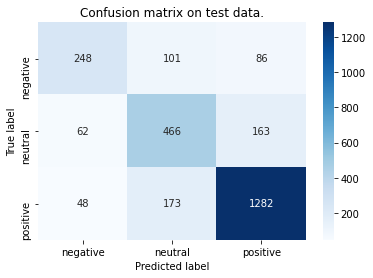

In [ ]:
!pip install bpemb

x_train = X_train
x_dev = X_dev
x_test = X_test

from bpemb import BPEmb
bpemb_vi = BPEmb(lang = 'vi', dim = 300, vs = 200000)

def __get_embedding_dict(model_filepath):
    embedding_dict = {}
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]
    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors
    return embedding_dict

def create_embedding_matrix(model_filepath, word2id):
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    embeddings_dict = __get_embedding_dict(model_filepath)
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector
    return embedding_matrix 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 50
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1
model_filepath = bpemb_vi.emb_file
embedding_matrix = create_embedding_matrix(model_filepath, tokenizer.word_index)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "post",padding = "post")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "post",padding = "post")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "post",padding = "post")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[5]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Head/APD_Not_Process_head.csv",
          index = None, header = False, mode = 'a')

# Model---Text-CNN---MULTI_WC_F_E_B

Epoch 1/10
37/37 [==============================] - 3s 46ms/step - loss: 0.6016 - accuracy: 0.5295 - val_loss: 0.5185 - val_accuracy: 0.6040
Epoch 2/10
37/37 [==============================] - 1s 38ms/step - loss: 0.4692 - accuracy: 0.6484 - val_loss: 0.3979 - val_accuracy: 0.7284
Epoch 3/10
37/37 [==============================] - 1s 38ms/step - loss: 0.3423 - accuracy: 0.7757 - val_loss: 0.3569 - val_accuracy: 0.7711
Epoch 4/10
37/37 [==============================] - 1s 37ms/step - loss: 0.2697 - accuracy: 0.8348 - val_loss: 0.3523 - val_accuracy: 0.7702
Epoch 5/10
37/37 [==============================] - 1s 37ms/step - loss: 0.2078 - accuracy: 0.8815 - val_loss: 0.3594 - val_accuracy: 0.7683
Epoch 6/10
37/37 [==============================] - 1s 37ms/step - loss: 0.1616 - accuracy: 0.9178 - val_loss: 0.3698 - val_accuracy: 0.7673
Epoch 7/10
37/37 [==============================] - 1s 37ms/step - loss: 0.1362 - accuracy: 0.9319 - val_loss: 0.3904 - val_accuracy: 0.7692
Epoch 8/10
37

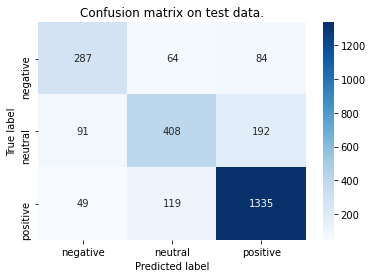

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

# Embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype = np.float32)[:embedding_dim]
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 50
embedding_dim = 300
word_vector = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/MULTI_W_F_B_E.vec'
embedding_matrix = create_embedding_matrix(word_vector, tokenizer.word_index, embedding_dim)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "post",padding = "post")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "post",padding = "post")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "post",padding = "post")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[6]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Head/APD_Not_Process_head.csv",
          index = None, header = False, mode = 'a')

# =============================================

# Model---Bi-GRU---FastText

Epoch 1/10
37/37 [==============================] - 12s 70ms/step - loss: 0.6354 - accuracy: 0.4914 - val_loss: 0.5627 - val_accuracy: 0.5499
Epoch 2/10
37/37 [==============================] - 2s 41ms/step - loss: 0.5347 - accuracy: 0.5710 - val_loss: 0.4414 - val_accuracy: 0.6743
Epoch 3/10
37/37 [==============================] - 2s 42ms/step - loss: 0.4099 - accuracy: 0.7097 - val_loss: 0.3952 - val_accuracy: 0.7208
Epoch 4/10
37/37 [==============================] - 2s 42ms/step - loss: 0.3421 - accuracy: 0.7711 - val_loss: 0.3690 - val_accuracy: 0.7369
Epoch 5/10
37/37 [==============================] - 2s 41ms/step - loss: 0.2933 - accuracy: 0.8150 - val_loss: 0.3785 - val_accuracy: 0.7417
Epoch 6/10
37/37 [==============================] - 2s 42ms/step - loss: 0.2636 - accuracy: 0.8361 - val_loss: 0.3858 - val_accuracy: 0.7407
Epoch 7/10
37/37 [==============================] - 2s 42ms/step - loss: 0.2342 - accuracy: 0.8535 - val_loss: 0.3984 - val_accuracy: 0.7360
Epoch 8/10
3

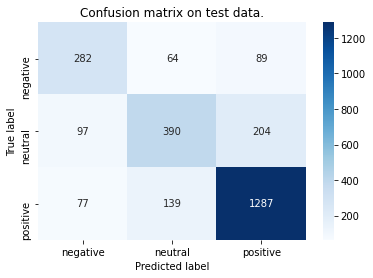

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

# Embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype = np.float32)[:embedding_dim]
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 50
embedding_dim = 300
word_vector = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/cc.vi.300.vec'
embedding_matrix = create_embedding_matrix(word_vector, tokenizer.word_index, embedding_dim)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "post",padding = "post")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "post",padding = "post")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "post",padding = "post")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[7]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Head/APD_Not_Process_head.csv",
          index = None, header = False, mode = 'a')

# Model---Bi-GRU---Wikipedia Word2vec

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


Epoch 1/10
37/37 [==============================] - 7s 83ms/step - loss: 0.6102 - accuracy: 0.5001 - val_loss: 0.5208 - val_accuracy: 0.5973
Epoch 2/10
37/37 [==============================] - 2s 57ms/step - loss: 0.4854 - accuracy: 0.6399 - val_loss: 0.4366 - val_accuracy: 0.6895
Epoch 3/10
37/37 [==============================] - 2s 56ms/step - loss: 0.4046 - accuracy: 0.7171 - val_loss: 0.4028 - val_accuracy: 0.7151
Epoch 4/10
37/37 [==============================] - 2s 56ms/step - loss: 0.3598 - accuracy: 0.7571 - val_loss: 0.4029 - val_accuracy: 0.7227
Epoch 5/10
37/37 [==============================] - 2s 55ms/step - loss: 0.3209 - accuracy: 0.7874 - val_loss: 0.3997 - val_accuracy: 0.7265
Epoch 6/10
37/37 [==============================] - 2s 56ms/step - loss: 0.2924 - accuracy: 0.8139 - val_loss: 0.3970 - val_accuracy: 0.7331
Epoch 7/10
37/37 [==============================] - 2s 54ms/step - loss: 0.2660 - accuracy: 0.8349 - val_loss: 0.4037 - val_accuracy: 0.7274
Epoch 8/10
37

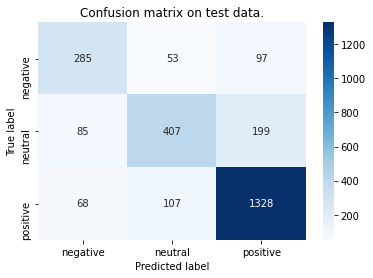

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

def __get_embedding_dict(model_filepath):
    embedding_dict = {}
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]

    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors

    return embedding_dict

def create_embedding_matrix(model_filepath, word2id):
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    embeddings_dict = __get_embedding_dict(model_filepath)
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 50
embedding_dim = 400
vocab_size = len(tokenizer.word_index) + 1
model_filepath = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/wiki.vi.model.bin'
embedding_matrix = create_embedding_matrix(model_filepath, tokenizer.word_index)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "post",padding = "post")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "post",padding = "post")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "post",padding = "post")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[8]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Head/APD_Not_Process_head.csv",
          index = None, header = False, mode = 'a')

# Model---Bi-GRU---BPEmb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


Epoch 1/10
37/37 [==============================] - 6s 69ms/step - loss: 0.6070 - accuracy: 0.5150 - val_loss: 0.5211 - val_accuracy: 0.5954
Epoch 2/10
37/37 [==============================] - 1s 40ms/step - loss: 0.4899 - accuracy: 0.6282 - val_loss: 0.4349 - val_accuracy: 0.6809
Epoch 3/10
37/37 [==============================] - 1s 40ms/step - loss: 0.4101 - accuracy: 0.7041 - val_loss: 0.3956 - val_accuracy: 0.7189
Epoch 4/10
37/37 [==============================] - 1s 39ms/step - loss: 0.3443 - accuracy: 0.7653 - val_loss: 0.3779 - val_accuracy: 0.7246
Epoch 5/10
37/37 [==============================] - 1s 39ms/step - loss: 0.3165 - accuracy: 0.7914 - val_loss: 0.3682 - val_accuracy: 0.7436
Epoch 6/10
37/37 [==============================] - 1s 40ms/step - loss: 0.2786 - accuracy: 0.8242 - val_loss: 0.3640 - val_accuracy: 0.7464
Epoch 7/10
37/37 [==============================] - 1s 40ms/step - loss: 0.2371 - accuracy: 0.8540 - val_loss: 0.3720 - val_accuracy: 0.7635
Epoch 8/10
37

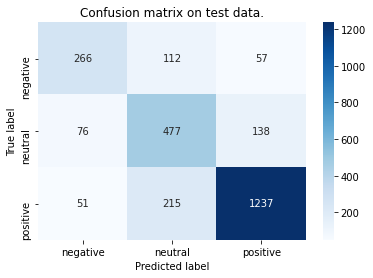

In [ ]:
!pip install bpemb

x_train = X_train
x_dev = X_dev
x_test = X_test

from bpemb import BPEmb
bpemb_vi = BPEmb(lang = 'vi', dim = 300, vs = 200000)

def __get_embedding_dict(model_filepath):
    embedding_dict = {}
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]

    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors

    return embedding_dict

def create_embedding_matrix(model_filepath, word2id):
    """
    Get the embedding matrix of the word2vec model
    :param model_filepath: the file path to the pre-build word2vec model
    :param word2id: the directory mapping from word to id
    :return: the embedding matrix of the word2vec model
    """
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    embeddings_dict = __get_embedding_dict(model_filepath)
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 50
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1
model_filepath = bpemb_vi.emb_file
embedding_matrix = create_embedding_matrix(model_filepath, tokenizer.word_index)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "post",padding = "post")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "post",padding = "post")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "post",padding = "post")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[9]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Head/APD_Not_Process_head.csv",
          index = None, header = False, mode = 'a')

# Model---Bi-GRU---MULTI_WC_F_E_B

Epoch 1/10
37/37 [==============================] - 6s 71ms/step - loss: 0.6477 - accuracy: 0.4878 - val_loss: 0.5551 - val_accuracy: 0.5537
Epoch 2/10
37/37 [==============================] - 2s 46ms/step - loss: 0.5226 - accuracy: 0.6005 - val_loss: 0.4335 - val_accuracy: 0.6762
Epoch 3/10
37/37 [==============================] - 2s 46ms/step - loss: 0.3917 - accuracy: 0.7296 - val_loss: 0.3798 - val_accuracy: 0.7312
Epoch 4/10
37/37 [==============================] - 2s 47ms/step - loss: 0.3250 - accuracy: 0.7885 - val_loss: 0.3765 - val_accuracy: 0.7417
Epoch 5/10
37/37 [==============================] - 2s 46ms/step - loss: 0.2778 - accuracy: 0.8247 - val_loss: 0.3849 - val_accuracy: 0.7341
Epoch 6/10
37/37 [==============================] - 2s 46ms/step - loss: 0.2353 - accuracy: 0.8544 - val_loss: 0.3936 - val_accuracy: 0.7464
Epoch 7/10
37/37 [==============================] - 2s 44ms/step - loss: 0.1998 - accuracy: 0.8810 - val_loss: 0.4048 - val_accuracy: 0.7360
Epoch 8/10
37

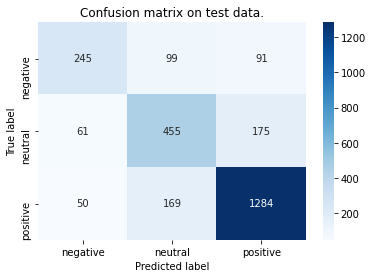

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

# Embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype = np.float32)[:embedding_dim]
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 50
embedding_dim = 300
word_vector = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/MULTI_W_F_B_E.vec'
embedding_matrix = create_embedding_matrix(word_vector, tokenizer.word_index, embedding_dim)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "post",padding = "post")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "post",padding = "post")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "post",padding = "post")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[10]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Head/APD_Not_Process_head.csv",
          index = None, header = False, mode = 'a')

# =========================================================

# BERT XLM-R

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense

***** Running training *****
  Num examples = 9458
  Num Epochs = 7
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 2072


Step,Training Loss
500,0.773700
1000,0.519100
1500,0.330700
2000,0.178100


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Prediction *****
  Num examples = 9458
  Batch size = 16


***** Running Prediction *****
  Num examples = 1053
  Batch size = 16
***** Running Prediction *****
  Num examples = 2629
  Batch size = 16


Accuracy train:  0.9796997251004441
Accuracy dev:  0.8243114909781576
Accuracy test:  0.8421453023963484
F1 macro test:  0.8163214160272722
Recall macro test:  0.8147729890784827
Precision macro test:  0.8189727462696506
F1 micro test:  0.8421453023963484
Recall micro test:  0.8421453023963484
Precision micro test:  0.8421453023963484


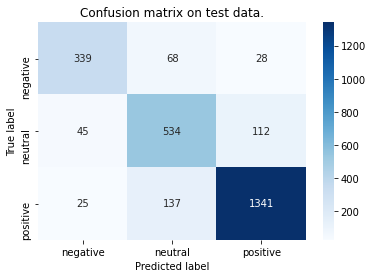

In [ ]:
# Xay dung data de fit vao mo hinh 
class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Khai bao pre-trained
model = AutoModelForSequenceClassification.from_pretrained('xlm-roberta-base', num_labels = 3)
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')

# encoding du lieu
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
dev_encodings = tokenizer(list(X_dev), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# Chuan bi data
train_dataset = BuildDataset(train_encodings, y_train)
dev_dataset = BuildDataset(dev_encodings, y_dev)
test_dataset = BuildDataset(test_encodings, y_test)

# Chuan bi mo hinh
training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs = 7,              
    per_device_train_batch_size=32,  
    per_device_eval_batch_size=16,
    warmup_steps=500,                
    weight_decay=0.01,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

# Huấn luyện mô hình
trainer.train()

train_dataset_pred = trainer.predict(train_dataset)
dev_dataset_pred = trainer.predict(dev_dataset)
test_dataset_pred = trainer.predict(test_dataset)

y_train_pred = np.argmax(train_dataset_pred.predictions, axis=-1)
y_dev_pred = np.argmax(dev_dataset_pred.predictions, axis=-1)
y_test_pred = np.argmax(test_dataset_pred.predictions, axis=-1)

y_train_true = train_dataset_pred.label_ids
y_dev_true = dev_dataset_pred.label_ids
y_test_true = test_dataset_pred.label_ids

# Danh gia mo hinh
acc_train = accuracy_score(y_train_true, y_train_pred)
acc_dev = accuracy_score(y_dev_true, y_dev_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)
f1_macro_test = f1_score(y_test_true, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test_true, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test_true, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test_true, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test_true, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test_true, y_test_pred, average='micro')
cm = confusion_matrix(y_test_true, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu dự đoán
result = pd.DataFrame([X_test, y_test_true, y_test_pred]).T
result.columns = ['text', 'true_label', 'pred_label']
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Predict CSV/APD_Not_Process/Head'
result.to_csv(path + '/' + 'xlm-r.csv', index=False)
result.head()

# Lưu record
df = pd.DataFrame({"Model": [model_name[11]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Head/APD_Not_Process_head.csv",
          index = None, header = False, mode = 'a')

# BERT MULTILINGUAL

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

***** Running training *****
  Num examples = 9458
  Num Epochs = 7
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 2072


Step,Training Loss
500,0.767500
1000,0.509300
1500,0.308900
2000,0.144900


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Prediction *****
  Num examples = 9458
  Batch size = 16


***** Running Prediction *****
  Num examples = 1053
  Batch size = 16
***** Running Prediction *****
  Num examples = 2629
  Batch size = 16


Accuracy train:  0.9851977162190738
Accuracy dev:  0.798670465337132
Accuracy test:  0.802966907569418
F1 macro test:  0.7677325127623554
Recall macro test:  0.7713736944384487
Precision macro test:  0.7646633988042421
F1 micro test:  0.8029669075694181
Recall micro test:  0.802966907569418
Precision micro test:  0.802966907569418


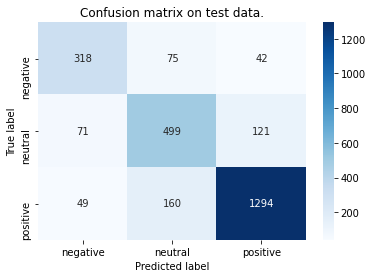

In [ ]:
# Xay dung data de fit vao mo hinh 
class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)
model = AutoModelForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels = 3)
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')

# encoding du lieu
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
dev_encodings = tokenizer(list(X_dev), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# Chuan bi data
train_dataset = BuildDataset(train_encodings, y_train)
dev_dataset = BuildDataset(dev_encodings, y_dev)
test_dataset = BuildDataset(test_encodings, y_test)

# Chuan bi mo hinh
training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs = 7,              
    per_device_train_batch_size=32,  
    per_device_eval_batch_size=16,
    warmup_steps=500,                
    weight_decay=0.01,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

# Huấn luyện mô hình
trainer.train()

train_dataset_pred = trainer.predict(train_dataset)
dev_dataset_pred = trainer.predict(dev_dataset)
test_dataset_pred = trainer.predict(test_dataset)

y_train_pred = np.argmax(train_dataset_pred.predictions, axis=-1)
y_dev_pred = np.argmax(dev_dataset_pred.predictions, axis=-1)
y_test_pred = np.argmax(test_dataset_pred.predictions, axis=-1)

y_train_true = train_dataset_pred.label_ids
y_dev_true = dev_dataset_pred.label_ids
y_test_true = test_dataset_pred.label_ids

# Danh gia mo hinh
acc_train = accuracy_score(y_train_true, y_train_pred)
acc_dev = accuracy_score(y_dev_true, y_dev_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)
f1_macro_test = f1_score(y_test_true, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test_true, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test_true, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test_true, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test_true, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test_true, y_test_pred, average='micro')
cm = confusion_matrix(y_test_true, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu dự đoán
result = pd.DataFrame([X_test, y_test_true, y_test_pred]).T
result.columns = ['text', 'true_label', 'pred_label']
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Predict CSV/APD_Not_Process/Head'
result.to_csv(path + '/' + 'bert-multi.csv', index=False)
result.head()

#Lưu record
df = pd.DataFrame({"Model": [model_name[12]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Head/APD_Not_Process_head.csv",
          index = None, header = False, mode = "a")

# BERT FPTAI/vibert-base-cased



https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmppghgaio3


storing https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/ac830dbe95fda61dfb6f6479706d481dd2c7c2ed4b9064b5fb56ecc53f0ed2fa.7d942d26e554f7243a0055f745a11844b215e58ac9e8a5dc60dbf1ec3c474a71
creating metadata file for /root/.cache/huggingface/transformers/ac830dbe95fda61dfb6f6479706d481dd2c7c2ed4b9064b5fb56ecc53f0ed2fa.7d942d26e554f7243a0055f745a11844b215e58ac9e8a5dc60dbf1ec3c474a71
loading configuration file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/ac830dbe95fda61dfb6f6479706d481dd2c7c2ed4b9064b5fb56ecc53f0ed2fa.7d942d26e554f7243a0055f745a11844b215e58ac9e8a5dc60dbf1ec3c474a71
Model config BertConfig {
  "_num_labels": 2,
  "attention_probs_dropout_prob": 0.1,
  "directionality": "bidi",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    

https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/pytorch_model.bin not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpmos9xqgk


storing https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/3b6bb982f8f72144ec767bb8989b8c461701c754926d55b2de1246236b033a41.2008df591695a6a2b7c9fecb024177ee92349c5d089f9063ea0413bbb07c3e5a
creating metadata file for /root/.cache/huggingface/transformers/3b6bb982f8f72144ec767bb8989b8c461701c754926d55b2de1246236b033a41.2008df591695a6a2b7c9fecb024177ee92349c5d089f9063ea0413bbb07c3e5a
loading weights file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/3b6bb982f8f72144ec767bb8989b8c461701c754926d55b2de1246236b033a41.2008df591695a6a2b7c9fecb024177ee92349c5d089f9063ea0413bbb07c3e5a


Some weights of the model checkpoint at FPTAI/vibert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not in

storing https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/c155f922cc460ace2ddcb1485f2768b33a43a86e4c6fea76677b773dfff3b232.3d46541cba3b17f4b15f094a380f7c83603387b794207b9b1f1b9dfd58b1d1c4
creating metadata file for /root/.cache/huggingface/transformers/c155f922cc460ace2ddcb1485f2768b33a43a86e4c6fea76677b773dfff3b232.3d46541cba3b17f4b15f094a380f7c83603387b794207b9b1f1b9dfd58b1d1c4


loading file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/c155f922cc460ace2ddcb1485f2768b33a43a86e4c6fea76677b773dfff3b232.3d46541cba3b17f4b15f094a380f7c83603387b794207b9b1f1b9dfd58b1d1c4
loading file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/tokenizer.json from cache at None
loading file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/tokenizer_config.json from cache at None
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). 

Step,Training Loss
500,0.859000
1000,0.635000
1500,0.496300
2000,0.375700
2500,0.269600
3000,0.202100
3500,0.127300
4000,0.078600


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2500
Configuration saved in ./results/checkpoint-2500/config.json
Model weights saved in ./results/checkpoint-2500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-3000
Configuration saved in ./results/checkpoint-3

***** Running Prediction *****
  Num examples = 1053
  Batch size = 16
***** Running Prediction *****
  Num examples = 2629
  Batch size = 16


Accuracy train:  0.9931275111017128
Accuracy dev:  0.792022792022792
Accuracy test:  0.798022061620388
F1 macro test:  0.759814229333235
Recall macro test:  0.7585265463328987
Precision macro test:  0.7626410671778158
F1 micro test:  0.7980220616203879
Recall micro test:  0.798022061620388
Precision micro test:  0.798022061620388


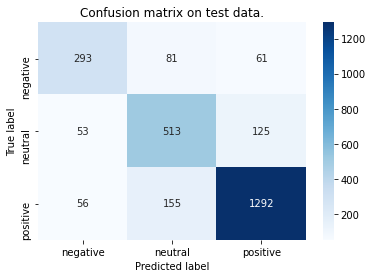

In [ ]:
# Xay dung data de fit vao mo hinh 
class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Khai bao pre-trained
model = AutoModelForSequenceClassification.from_pretrained('FPTAI/vibert-base-cased', num_labels = 3)
tokenizer = AutoTokenizer.from_pretrained('FPTAI/vibert-base-cased')

# encoding du lieu
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
dev_encodings = tokenizer(list(X_dev), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# Chuan bi data
train_dataset = BuildDataset(train_encodings, y_train)
dev_dataset = BuildDataset(dev_encodings, y_dev)
test_dataset = BuildDataset(test_encodings, y_test)

# Chuan bi mo hinh
training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs = 7,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,
    warmup_steps=500,                
    weight_decay=0.01,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

# Huấn luyện mô hình
trainer.train()

train_dataset_pred = trainer.predict(train_dataset)
dev_dataset_pred = trainer.predict(dev_dataset)
test_dataset_pred = trainer.predict(test_dataset)

y_train_pred = np.argmax(train_dataset_pred.predictions, axis=-1)
y_dev_pred = np.argmax(dev_dataset_pred.predictions, axis=-1)
y_test_pred = np.argmax(test_dataset_pred.predictions, axis=-1)

y_train_true = train_dataset_pred.label_ids
y_dev_true = dev_dataset_pred.label_ids
y_test_true = test_dataset_pred.label_ids

# Danh gia mo hinh
acc_train = accuracy_score(y_train_true, y_train_pred)
acc_dev = accuracy_score(y_dev_true, y_dev_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)
f1_macro_test = f1_score(y_test_true, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test_true, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test_true, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test_true, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test_true, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test_true, y_test_pred, average='micro')
cm = confusion_matrix(y_test_true, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu dự đoán
result = pd.DataFrame([X_test, y_test_true, y_test_pred]).T
result.columns = ['text', 'true_label', 'pred_label']
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Predict CSV/APD_Not_Process/Head'
result.to_csv(path + '/' + 'vibert-base-cased.csv', index=False)
result.head()

# Lưu record
df = pd.DataFrame({"Model": [model_name[13]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Head/APD_Not_Process_head.csv",
          index = None, header = False, mode = 'a')

# BERT vinai/phobert-base

     |████████████████████████████████| 2.7MB 36.7MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-cp37-none-any.whl size=2645952 sha256=b35d2eaccf3555f180889ab79171eea6a9bbf536a3ff392c95bee4beeedadb35
  Stored in directory: /root/.cache/pip/wheels/09/54/8b/043667de6091d06a381d7745f44174504a9a4a56ecc9380c54
Successfully built vncorenlp
Cloning into 'VnCoreNLP'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 54 (delta 1), reused 41 (delta 0), pack-reused 0
Unpacking objects: 100% (54/54), done.


loading configuration file https://huggingface.co/vinai/phobert-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/a596f267f08b7158c7ab6300b1bf98eb6e1b05e6bcb0d7c18a8070364ee3011b.bbe27b2cac909b2279c83792c2d2b6f159f0a95f5d1c1eb66451da1c89a53609
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 258,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "tokenizer_class": "PhobertToken

Step,Training Loss
500,0.759800
1000,0.529000
1500,0.419900
2000,0.321900
2500,0.227900
3000,0.171100
3500,0.110200
4000,0.064500


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2500
Configuration saved in ./results/checkpoint-2500/config.json
Model weights saved in ./results/checkpoint-2500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-3000
Configuration saved in ./results/checkpoint-3

***** Running Prediction *****
  Num examples = 1053
  Batch size = 16
***** Running Prediction *****
  Num examples = 2629
  Batch size = 16


Accuracy train:  0.9934447028970184
Accuracy dev:  0.8452041785375118
Accuracy test:  0.8524153670597185
F1 macro test:  0.8292102241246976
Recall macro test:  0.8270111804934469
Precision macro test:  0.8320284597079649
F1 micro test:  0.8524153670597185
Recall micro test:  0.8524153670597185
Precision micro test:  0.8524153670597185


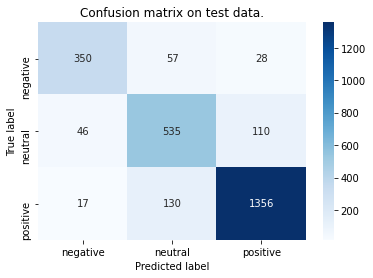

NameError: ignored

In [ ]:
# VNCoreNLP tách từ
!pip install deplacy vncorenlp
!test -d VnCoreNLP || git clone --depth=1 https://github.com/vncorenlp/VnCoreNLP
from vncorenlp import VnCoreNLP
vncorenlp = VnCoreNLP("VnCoreNLP/VnCoreNLP-1.1.1.jar",annotators="wseg")
def vncore_tokenize(document):
    l = vncorenlp.tokenize(document)[0]
    document = ''
    for i in range(len(l)):
        document += l[i] + ' '
    document = document[:-1]
    return document

def text_preprocessing(X):
    for i in range(len(X)):
        X[i] = vncore_tokenize(X[i])
    return X

X_train = text_preprocessing(X_train)
X_dev = text_preprocessing(X_dev)
X_test = text_preprocessing(X_test)

# Xay dung data de fit vao mo hinh 
class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Khai bao pre-trained
model = AutoModelForSequenceClassification.from_pretrained('vinai/phobert-base', num_labels = 3)
tokenizer = AutoTokenizer.from_pretrained('vinai/phobert-base')

# encoding du lieu
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
dev_encodings = tokenizer(list(X_dev), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# Chuan bi data
train_dataset = BuildDataset(train_encodings, y_train)
dev_dataset = BuildDataset(dev_encodings, y_dev)
test_dataset = BuildDataset(test_encodings, y_test)

# Chuan bi mo hinh
training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs = 7,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,
    warmup_steps=500,                
    weight_decay=0.01,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

# Huấn luyện mô hình
trainer.train()

train_dataset_pred = trainer.predict(train_dataset)
dev_dataset_pred = trainer.predict(dev_dataset)
test_dataset_pred = trainer.predict(test_dataset)

y_train_pred = np.argmax(train_dataset_pred.predictions, axis=-1)
y_dev_pred = np.argmax(dev_dataset_pred.predictions, axis=-1)
y_test_pred = np.argmax(test_dataset_pred.predictions, axis=-1)

y_train_true = train_dataset_pred.label_ids
y_dev_true = dev_dataset_pred.label_ids
y_test_true = test_dataset_pred.label_ids

# Danh gia mo hinh
acc_train = accuracy_score(y_train_true, y_train_pred)
acc_dev = accuracy_score(y_dev_true, y_dev_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)
f1_macro_test = f1_score(y_test_true, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test_true, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test_true, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test_true, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test_true, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test_true, y_test_pred, average='micro')
cm = confusion_matrix(y_test_true, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu dự đoán
result = pd.DataFrame([X_test, y_test_true, y_test_pred]).T
result.columns = ['text', 'true_label', 'pred_label']
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Predict CSV/APD_Not_Process/Head'
result.to_csv(path + '/' + 'phoBert.csv', index=False)
result.head()

# Lưu record
df = pd.DataFrame({"Model": [model_name[14]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Head/APD_Not_Process_head.csv",
          index = None, header = False, mode = 'a')